<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Likhitha/Text_classification_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


✅ Accuracy: 1.0

📋 Classification Report:
               precision    recall  f1-score   support

    Business       1.00      1.00      1.00         2
      Health       1.00      1.00      1.00         2
      Sports       1.00      1.00      1.00         2
  Technology       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8


🔁 Confusion Matrix:
 [[2 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 0 2]]


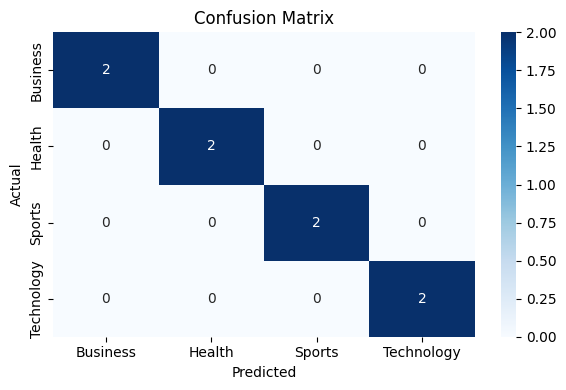

In [2]:
# -------------------------------
# STEP 0: IMPORTS & SETUP
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re, string, nltk, ssl
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

# -------------------------------
# STEP 1: CREATE DATA
# -------------------------------
def create_news_dataset():
    tech = ["AI breakthrough improves algorithms"] * 10
    sports = ["Team wins championship in overtime"] * 10
    business = ["Market hits record highs"] * 10
    health = ["New vaccine effective in trials"] * 10
    return pd.DataFrame({
        "text": tech + sports + business + health,
        "category": ["Technology"]*10 + ["Sports"]*10 + ["Business"]*10 + ["Health"]*10
    })

news_df = create_news_dataset()

# -------------------------------
# STEP 2: TEXT PREPROCESSING
# -------------------------------
class TextPreprocessor:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def clean(self, text):
        text = text.lower()
        text = re.sub(r"http\S+|www\S+", "", text)
        text = re.sub(r"\s+", " ", text)
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(text)
        tokens = [self.lemmatizer.lemmatize(t) for t in tokens if t not in self.stop_words and len(t) > 2]
        return ' '.join(tokens)

preprocessor = TextPreprocessor()
news_df["text_clean"] = news_df["text"].apply(preprocessor.clean)

# -------------------------------
# STEP 3: FEATURE EXTRACTION
# -------------------------------
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(news_df["text_clean"])
y = news_df["category"]

# -------------------------------
# STEP 4: TRAIN/TEST SPLIT
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# -------------------------------
# STEP 5: MODEL TRAINING
# -------------------------------
model = MultinomialNB()
model.fit(X_train, y_train)

# -------------------------------
# STEP 6: EVALUATION
# -------------------------------
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)

print("✅ Accuracy:", round(acc, 3))
print("\n📋 Classification Report:\n", report)
print("\n🔁 Confusion Matrix:\n", conf)

# -------------------------------
# STEP 7: VISUALIZATION
# -------------------------------
plt.figure(figsize=(6,4))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
